In [ ]:
#@title Parameters
from ipywidgets import FloatText, Checkbox, VBox, Dropdown
import ipywidgets as widgets

currentAmp = FloatText(description='Amplitude:', value=0.1)
sets = FloatText(description='sets:', value=15)
noiseSD = FloatText(description='noiseSD:', value=0.01)

vb = VBox(children = [currentAmp, sets])
with_noise = Checkbox(description='Add noise')

def add_noise(button):
    if button['new']:
        vb.children = [currentAmp, sets, noiseSD]
    else:
        vb.children = [currentAmp, sets]

with_noise.observe(add_noise, names='value')
display(with_noise)
display(vb)

Checkbox(value=False, description='Add noise')

In [ ]:
#@title Distribution
from ipywidgets import FloatText, Checkbox, VBox, Dropdown
import ipywidgets as widgets

distribution = Dropdown(description='distribution:', options=["uniform", "normal", "poisson"], value="uniform")
low = FloatText(description='low:', value=1)
high = FloatText(description='high:', value=1.5)
leng = FloatText(description='size:', value=sets.value)
mean = FloatText(description='mean:', value=1)
sd = FloatText(description='SD:', value=0.5)
lam = FloatText(description='lam', value=3)

vb2 = VBox(children = [low, high, leng])

def change_widgets(button):
    if button['new'] == "uniform":
        vb2.children = [low, high, leng]
    elif button['new'] == "normal":
        vb2.children = [mean, sd, leng]
    elif button['new'] == "poisson":
        vb2.children = [lam, sets]

distribution.observe(change_widgets, names='value')
display(distribution)
display(vb2)

Dropdown(description='distribution:', options=('uniform', 'normal', 'poisson'), value='uniform')

In [ ]:
#@title Set Delays
delayP1P2 = 0.1 #@param {type:"number"}
delayP2P1 = 0.3 #@param {type:"number"}

# References:

1. [Syntax](https://www.neuron.yale.edu/neuron/static/new_doc/programming/hocsyntax.html)
2. [Python docs for Neuron](https://www.neuron.yale.edu/neuron/static/new_doc/programming/python.html)
3. [More Python docs](https://www.neuron.yale.edu/neuron/static/py_doc/programming/python.html)
4. [GeeksForGeeks Single Neural net](https://www.geeksforgeeks.org/single-neuron-neural-network-python/)
5. [Freeman K-Sets github](https://github.com/piazentin/ksets)
6. AP - https://www.moleculardevices.com/applications/patch-clamp-electrophysiology/what-action-potential#gref
7. https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/network/netcon.html
8. http://neupy.com/apidocs/neupy.algorithms.associative.hebb.html
9. https://qbi-software.github.io/NEURON-tutorial/lessons/network
10. https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/topology/geometry.html
11. http://www.cnel.ufl.edu/courses/EEL6814/chapter6.pdf
12. https://www.slideshare.net/mentelibre/hebbian-learning
13. http://www.diva-portal.org/smash/get/diva2:1089220/FULLTEXT02
14. [Use this for ExpSyn tau](https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html#ExpSyn)

# Doubts for 4-coupled
- [Negative weights for NetCon](https://www.neuron.yale.edu/phpBB/viewtopic.php?t=3306)
- [Excitatory conductances](https://www.neuron.yale.edu/phpBB/viewtopic.php?t=4415)

# Stage 0: Adjust this Jupyter notebook for Colab

In [ ]:
!pip3 install neuron matplotlib seaborn bokeh neuron

     |████████████████████████████████| 12.6 MB 5.3 MB/s 


### Stage 1: Import the required libraries

In [ ]:
from neuron import h                     #.h is a HOC object instance & gui from neuron can also be imported 
from neuron.units import ms,mV
h.load_file('stdrun.hoc')                #Allows us to do a high level simulation

import random  

%matplotlib notebook
import matplotlib.pyplot as plt1

from bokeh.io import output_notebook
import bokeh.plotting as plt2
output_notebook()

import seaborn as sns
# size=int(input('Enter no.of sets  ')
# size=2

In [ ]:
import time
totalstart = time.time()
import os
if os.getcwd() != "/content":
    # we are not in google colab, assume hebbian library is in current dir
    from hebb import ORN, MCELL, GCELL
else:
    # download from git
    import shutil, requests
    url = 'https://cloud.operationtulip.com/s/t8nbn8Y582w94P3/download/git.zip'
    response = requests.get(url, stream=True)
    with open('git.zip', 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response
    import zipfile
    with zipfile.ZipFile('git.zip', 'r') as zip_ref:
        zip_ref.extractall('')

In [ ]:
from neuron import h #.h is a HOC object instance & gui from neuron can also be imported 
from math import pi                  
from neuron.units import ms,mV
from hebb_test import ORN, MCELL, GCELL
h.load_file('stdrun.hoc')                #Allows us to do a high level simulation
pc = h.ParallelContext()
import random  
import matplotlib.pyplot as plt1

from bokeh.io import output_notebook
import bokeh.plotting as plt2
output_notebook()

import seaborn as sns

### Stage 2: Make the Mcell and Gcell with the specific properties

In [ ]:
def stairstep(lo: float, hi: float, duration: int, max_duration: int = 200, noise: list = []) -> list:
    # duration and max_duration are in ms
    ans = [lo if i < duration else hi for i in range(0,max_duration)]
    if len(noise) == 0:
        return ans
    else:
        assert len(ans) == len(noise)
        return [ans[i]+noise[i] for i in range(len(ans))]
    # return [0+0.8*(i/duration) if i < duration else 0 for i in range(0,max_duration)]
    # visualize input 

In [ ]:
def netConMaker(source, dest, weights, delay, threshold, place='axon', type='exc'):
    # print(source, dest)
    if place == 'axon':
        if type == 'exc':
            netcon = h.NetCon(source.axon(0.5)._ref_v, dest.dendexcisyn, sec=source.axon)
        elif type == 'inh':
            netcon = h.NetCon(source.axon(0.5)._ref_v, dest.dendinhisyn, sec=source.axon)
    elif place == 'soma':
        if type == 'exc':
            netcon = h.NetCon(source.soma(0.5)._ref_v, dest.dendexcisyn, sec=source.soma)
        elif type == 'inh':
            netcon = h.NetCon(source.soma(0.5)._ref_v, dest.dendinhisyn, sec=source.soma)
    netcon.weight[0] = weights
    netcon.delay = delay
    netcon.threshold = threshold
    return netcon

In [ ]:
def latConMaker(source, dest, weights, delay, threshold, type='exc'):
    if type == 'exc':
        netcon = h.NetCon(source.dend(0.5)._ref_v, dest.dendexcisyn, sec=source.dend)
    else:
        netcon = h.NetCon(source.dend(0.5)._ref_v, dest.dendinhisyn, sec=source.dend)
    netcon.weight[0] = weights
    netcon.delay = delay
    netcon.threshold = threshold
    return netcon

In [ ]:
def plotCell(source, name, addendum=''):
    recording_cell = source
    cell_axon = h.Vector().record(recording_cell.axon(0.5)._ref_v)
    cell_dend = h.Vector().record(recording_cell.dend(0.5)._ref_v)
    t = h.Vector().record(h._ref_t)

    h.finitialize(-70 * mV)
    h.continuerun(300 * ms)

    f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
    f.line(t, list(cell_axon), line_width=1,legend_label=name+' axon '+addendum,line_color='black')
    f.line(t, list(cell_dend), line_width=2,legend_label=name+' dendrite '+addendum,line_color='red', line_dash='dashed')
    plt2.show(f)

In [ ]:
import math
def generate_L_weight_delta(first, second):
    A_plus = 0.01
    A_minus = -0.011
    tau_pre =20*ms
    tau_post =20*ms
    delta_t = [(second[iter] - first[iter]) for iter in range(min(len(first),len(second)))]
    delta_w_list = [A_plus*math.exp(-delta_t[iter]/tau_post) if delta_t[iter] >=0 else A_minus*math.exp(delta_t[iter]/tau_pre) for iter in range(min(len(first),len(second)))]  
    delta_w = sum(delta_w_list)
    return delta_w

In [ ]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

### Stage 3: Import random weights
We import the random weights as intitally the weights of the neurons are not adjusted to fire synchronously.

In [ ]:
import numpy as np
if distribution.value == "uniform":
    weights = np.random.uniform(low.value, high.value, 2*int(leng.value)-1)
elif distribution.value == "normal":
    weights = np.random.normal(mean.value, sd.value, 2*int(leng.value)-1)
elif distribution.value == "poisson":
    weights = np.random.poisson(lam.value, 2*int(leng.value)-1)

In [ ]:
import numpy as np

#wMM = random.uniform(0,1)
#wMG = random.uniform(0,1)
#wGM = random.uniform(0,1)
#wGG = random.uniform(0,1)
#wMML = random.uniform(0,1)
#wGGL = random.uniform(0,1)

s1= [4.6, 2.1, 4.5, 1.3, 1.5, 2.6]
s2= [1.3, 1.4, 2.0, 2.0, 0.001, 0.001] 
#s3 = [wMM,wMG,wGM,wGG,wMML,wGGL]
# weights = [4.65058555, 2.92840154, 3.68134116, 1.30487304, 1.07771946, 3.15136447, 1.04247865, 2.29878494, 2.01195344]
# weights = uniform_distribution

print(weights)

[2.87569324 2.09141342 4.74597909 3.42092419 2.12853792 3.48141985
 2.7210264  3.69521909 3.01441838]


### Stage 4: Couple Mcell and Gcell according to Freeman's KII Set with the weights generated above

In [ ]:
#Gives one 2 coupled neuron using freeman's topology in olfactory bulb
class CONNECTING:

    def __init__(self,M,weights,delay1=0,delay2=2,delay3=4,delay4=6):
        wMM=weights[0]
        wMG=weights[1]
        wGM=weights[2]
        wGG=weights[3]
        
        self.M = M #Set no.
        self.th = -70
        self.maindelay = 5
        
        self.cells = []
    
        # 4-coupled

        self.M1=MCELL(1,self.M)
        self.M2=MCELL(2,self.M)
        self.G1=GCELL(3,self.M)
        self.G2=GCELL(4,self.M)
        self.cells.extend([self.M1, self.M2, self.G1, self.G2])

        #Giving current pulse
        self.stim = h.IClamp(self.M1.dend(0.5))  #current at M1.dend
        if with_noise.value == True:
            self.noise = np.random.normal(0, noiseSD.value, 100)
            self.input = h.Vector(stairstep(0,currentAmp.value,10,100,self.noise))
            self.tv = h.Vector([i for i in range(100)])
            self.stim.delay = 10
            self.stim.dur = 100
            self.stim.amp = 0
            self.input.play(self.stim._ref_amp, self.tv, True) 
        else:
            self.stim.delay = 10
            self.stim.dur = 100
            self.stim.amp = currentAmp.value
        

        self.nc4 = netConMaker(self.M1, self.M2, wMM, delay2+self.maindelay, self.th, 'soma') #Connecting M1 to M2
        self.nc5 = netConMaker(self.M2, self.M1, wMM, delay2+self.maindelay, self.th, 'soma') #Connecting M2 to M1
        self.nc6 = netConMaker(self.M2, self.G1, wMG, delay2+self.maindelay, self.th, 'soma') #Connecting M2 to G1
        self.nc7 = netConMaker(self.G1, self.M2, wGM, delay2+self.maindelay, self.th, 'soma', type='inh') #Connecting G1 to M2
        self.nc8 = netConMaker(self.G1, self.G2, wGG, delay3+self.maindelay, self.th, 'soma', type='inh') #Connecting G1 to G2
        self.nc9 = netConMaker(self.G2, self.G1, wGG, delay3+self.maindelay, self.th, 'soma', type='inh') #Connecting G2 to G1
        self.nc10 = netConMaker(self.G2, self.M1, wGM, delay4+self.maindelay, self.th, 'soma', type='inh') #Connecting G2 to M1
        self.nc11 = netConMaker(self.M1, self.G2, wMG, delay4+self.maindelay, self.th, 'soma') #Connecting M1 to G2
        self.nc12 = netConMaker(self.M1, self.G1, wMG, delay1+self.maindelay, self.th, 'soma') #Connecting M1 to G1
        self.nc13 = netConMaker(self.G1, self.M1, wGM, delay1+self.maindelay, self.th, 'soma', type='inh') #Connecting G1 to M1

### Stage 5: Laterally connect each set of 4 coupled neurons according to Freeman's KII Set

In [ ]:

class LATERAL:
    """Laterally coupling N-2 coupled neurons
    """
    def __init__(self,N,weights,delay1=0,delay2=2,delay3=4,delay4=6):
        wMML=weights[1]
        wGGL=weights[5]
        
        self.N = N
        self.th = -70
        self.maindelay = 5
        self.sets = [CONNECTING(i, weights) for i in range(N)]
        self.fourCupArr = []
        for r in range(1,N-1):
            for j in range(N-r):
                netConList = []
                
                netConList.append(latConMaker(self.sets[j].M1, self.sets[j+r].M1, wMML, self.maindelay+delay3, self.th)) #Connect M1[0] to M1[1]
                netConList.append(latConMaker(self.sets[j+r].M1, self.sets[j].M1, wMML, self.maindelay+delay3, self.th)) #Connect M1[1] to M1[0]
                netConList.append(latConMaker(self.sets[j].G1, self.sets[j+r].G1, wGGL, self.maindelay+delay2, self.th, 'inh')) #Connecting G1[0] to G1[1]
                netConList.append(latConMaker(self.sets[j+r].G1, self.sets[j].G1, wGGL, self.maindelay+delay2, self.th, 'inh')) #Connecting G1[1] to G1[0]
                self.fourCupArr.append(netConList)
        


### Stage 6: Input the number of 4 coupled sets required (which are all laterally connected)

In [ ]:
#Give N value to get N no. of 4 coupled neurons laterally connected
#given_input_from_user = int(input('Enter the number of 4 coupled sets required: '))
size = int(sets.value)
print(weights)
L1=LATERAL(size,weights)

[2.87569324 2.09141342 4.74597909 3.42092419 2.12853792 3.48141985
 2.7210264  3.69521909 3.01441838]


### Stage 7: Visualize the topology of the neurons and the 3D space they are in. Also visualize the density mechanisms added to each neuron of a set.

In [ ]:
# h.topology()

In [ ]:
#h.PlotShape(False).plot(plt1)

In [ ]:
#ps = h.PlotShape(False)
#ps.plot(plt1)

In [ ]:
# for sec in h.allsec():
#     print('%s: %s' % (sec, ', '.join(sec.psection()['density_mechs'].keys())))

In [ ]:
recording_cell = L1.sets[0].stim
graph = h.Vector().record(recording_cell._ref_i)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(300*ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(graph), line_width=2,legend_label='Input',line_color='black')
plt2.show(f)

### Stage 8: Record & visualize the voltage values at each axon of a neuron in the 1st set

In [ ]:
plotCell(L1.sets[-1].M1, 'M1', '(4-coupled)')

In [ ]:
plotCell(L1.sets[-1].M2, 'M2', '(4-coupled)')

In [ ]:
plotCell(L1.sets[-1].G1, 'G1', '(4-coupled)')

In [ ]:
plotCell(L1.sets[-1].G2, 'G2', '(4-coupled)')

In [ ]:
import numpy as np
from matplotlib import pyplot

vvecAArr=[]
kvecAArr=[]
mvecAArr=[]
hvecAArr=[]
nvecAArr=[]
for i in L1.sets:
    for cell in i.cells:
        checkCell = cell.axon(0.5)
        vvecAArr.append(h.Vector().record(checkCell._ref_v))
        kvecAArr.append(h.Vector().record(checkCell.k_ion._ref_ik))
        # nvecA = h.Vector().record(checkCell.na_ion._ref_ina)
        mvecAArr.append(h.Vector().record(checkCell.hh._ref_m))
        hvecAArr.append(h.Vector().record(checkCell.hh._ref_h))
        nvecAArr.append(h.Vector().record(checkCell.hh._ref_n))

tvec = h.Vector().record(h._ref_t)

h.finitialize(-70)
h.continuerun(300)

vvecMean = np.mean(vvecAArr,axis=0)
hvecMean = np.mean(hvecAArr,axis=0)
nvecMean = np.mean(nvecAArr,axis=0)
kvecMean = np.mean(kvecAArr,axis=0)

fig = pyplot.figure()
pyplot.plot(tvec, vvecMean, label="Membrane potential")
pyplot.xlabel('t (ms)')
pyplot.ylabel('V$_m$ (mV)')
pyplot.legend(frameon=False)
pyplot.show()

fig = pyplot.figure()
pyplot.plot(tvec, hvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('state')
pyplot.legend(frameon=False)
pyplot.show()

fig = pyplot.figure()
pyplot.plot(tvec, kvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('current (mA/cm$^2$)')
pyplot.legend(frameon=False)
pyplot.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

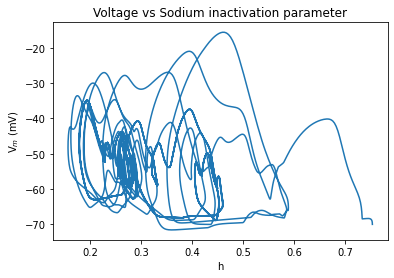

In [ ]:
%matplotlib inline
fig = pyplot.figure()
pyplot.plot(hvecMean, vvecMean, label="")
pyplot.xlabel('h')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Sodium inactivation parameter')
fig.show()

No handles with labels found to put in legend.


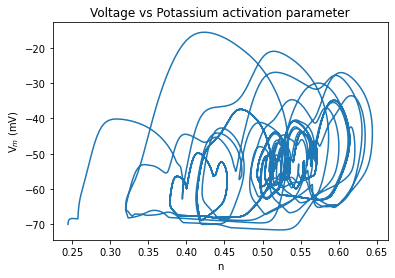

In [ ]:
fig = pyplot.figure()
pyplot.plot(nvecMean, vvecMean, label="")
pyplot.xlabel('n')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Potassium activation parameter')
pyplot.legend(frameon=False)

In [ ]:
def generate_L_weight_delta(first, second):
    A_plus = 0.01
    A_minus = -0.01
    tau_pre =20*ms
    tau_post =20*ms
    delta_t = [(second[iter] - first[iter]) for iter in range(min(len(first),len(second)))]
    delta_w_list = [A_plus*math.exp(-delta_t[iter]/tau_post) if delta_t[iter] >=0.24 else A_minus*math.exp(delta_t[iter]/tau_pre) for iter in range(min(len(first),len(second)))]  
    delta_w = sum(delta_w_list)
    return delta_w

## Learning

In [ ]:
import sys, time
tick = time.time()
epochs = 20
weight_data = []

out = display(progress(0, epochs), display_id=True)

for l in range(epochs):
    #print("iteration no is",l)
    out.update(progress(l, epochs))    
    # print("\nmutual learning")
    M1_axon_data = []
    M1_dend_data = []
    M2_axon_data = []
    M2_dend_data = []
    G1_axon_data = []
    G1_dend_data = []
    G2_axon_data = []
    G2_dend_data = []
    P1_spike_times = []
    P2_spike_times = []
    M1_spike_times = []
    M2_spike_times = []
    G1_spike_times = []
    G2_spike_times = []

    h.finitialize(-70* mV)
    h.continuerun(300*ms)
    t = h.Vector().record(h._ref_t)
    
    for i in range(len(L1.sets)):
        M1_axon_data.append(list(h.Vector().record(L1.sets[i].M1.axon(0.5)._ref_v)))
        M1_dend_data.append(list(h.Vector().record(L1.sets[i].M1.dend(0.5)._ref_v)))
        M1_spike_times.append(list(L1.sets[i].M1.spike_times))
        M2_axon_data.append(list(h.Vector().record(L1.sets[i].M2.axon(0.5)._ref_v)))
        M2_dend_data.append(list(h.Vector().record(L1.sets[i].M2.dend(0.5)._ref_v)))
        M2_spike_times.append(list(L1.sets[i].M2.spike_times))
        G1_axon_data.append(list(h.Vector().record(L1.sets[i].G1.axon(0.5)._ref_v)))
        G1_dend_data.append(list(h.Vector().record(L1.sets[i].G1.dend(0.5)._ref_v)))
        G1_spike_times.append(list(L1.sets[i].G1.spike_times))
        G2_axon_data.append(list(h.Vector().record(L1.sets[i].G2.axon(0.5)._ref_v)))
        G2_dend_data.append(list(h.Vector().record(L1.sets[i].G2.dend(0.5)._ref_v)))
        G2_spike_times.append(list(L1.sets[i].G2.spike_times))

   
    # h.finitialize(-70 * mV)

    for i in range(len(L1.sets)):
        # 4-coupled STDP-based learning
        L1.sets[i].nc4.weight[0] += generate_L_weight_delta(M1_spike_times[i], M2_spike_times[i])
        L1.sets[i].nc5.weight[0] += generate_L_weight_delta(M2_spike_times[i], M1_spike_times[i])
        L1.sets[i].nc6.weight[0] += generate_L_weight_delta(M2_spike_times[i], G1_spike_times[i])
        L1.sets[i].nc7.weight[0] += generate_L_weight_delta(G1_spike_times[i], M2_spike_times[i])
        L1.sets[i].nc8.weight[0] += generate_L_weight_delta(G1_spike_times[i], G2_spike_times[i])
        L1.sets[i].nc9.weight[0] += generate_L_weight_delta(G2_spike_times[i], G1_spike_times[i])
        L1.sets[i].nc10.weight[0] += generate_L_weight_delta(G2_spike_times[i], M1_spike_times[i])
        L1.sets[i].nc11.weight[0] += generate_L_weight_delta(M1_spike_times[i], G2_spike_times[i])
        L1.sets[i].nc12.weight[0] += generate_L_weight_delta(M1_spike_times[i], G1_spike_times[i])
        L1.sets[i].nc13.weight[0] += generate_L_weight_delta(G1_spike_times[i], M1_spike_times[i])
        # L1.sets[i].DPC.weight[0] += generate_L_weight_delta(G1_spike_times[i], M1_spike_times[i])
        
    # do a proper logging function
    # weight_data.append(L1.sets[0].nc1.weight[0])


    #Lateral Learning
    for i in range(len(L1.sets)-1):
        # 4-coupled part
        L1.fourCupArr[i][0].weight[0] += generate_L_weight_delta(M1_spike_times[i], M1_spike_times[i+1])
        L1.fourCupArr[i][1].weight[0] += generate_L_weight_delta(M1_spike_times[i+1], M1_spike_times[i])
        L1.fourCupArr[i][2].weight[0] += generate_L_weight_delta(G1_spike_times[i], G1_spike_times[i+1])
        L1.fourCupArr[i][3].weight[0] += generate_L_weight_delta(G1_spike_times[i+1], G1_spike_times[i])
    plotCell(L1.sets[-1].M1, 'M1')


out.update(progress(epochs, epochs))    
tock = time.time()
print("The time it took to learn", tock-tick, "seconds")

KeyboardInterrupt: ignored

In [ ]:
recording_cell = L1.sets[2].G1
axon_g2 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
dend_g2 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-40 * mV)
h.continuerun(300 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_g2), line_width=1,legend_label='G1 axon',line_color='black')
f.line(t, list(dend_g2), line_width=2,legend_label='G1 dendrite',line_color='red', line_dash='dashed')
plt2.show(f)

In [ ]:
recording_cell = L1.sets[-1].M1
axon_g2 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
dend_g2 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-40 * mV)
h.continuerun(300 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_g2), line_width=1,legend_label='M1 axon',line_color='black')
f.line(t, list(dend_g2), line_width=2,legend_label='M1 dendrite',line_color='red', line_dash='dashed')
plt2.show(f)

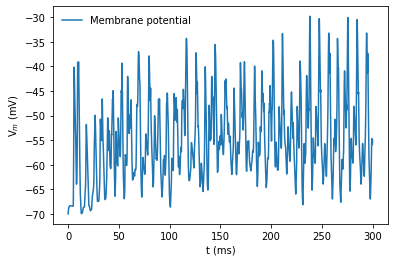

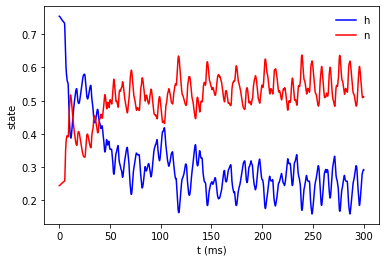

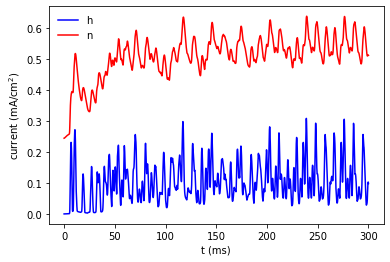

In [ ]:
import numpy as np
from matplotlib import pyplot

vvecAArr=[]
kvecAArr=[]
mvecAArr=[]
hvecAArr=[]
nvecAArr=[]
for i in L1.sets:
    for cell in i.cells:
        checkCell = cell.axon(0.5)
        vvecAArr.append(h.Vector().record(checkCell._ref_v))
        kvecAArr.append(h.Vector().record(checkCell.k_ion._ref_ik))
        # nvecA = h.Vector().record(checkCell.na_ion._ref_ina)
        mvecAArr.append(h.Vector().record(checkCell.hh._ref_m))
        hvecAArr.append(h.Vector().record(checkCell.hh._ref_h))
        nvecAArr.append(h.Vector().record(checkCell.hh._ref_n))

tvec = h.Vector().record(h._ref_t)

h.finitialize(-70)
h.continuerun(300)

vvecMean = np.mean(vvecAArr,axis=0)
hvecMean = np.mean(hvecAArr,axis=0)
nvecMean = np.mean(nvecAArr,axis=0)
kvecMean = np.mean(kvecAArr,axis=0)

fig = pyplot.figure()
pyplot.plot(tvec, vvecMean, label="Membrane potential")
pyplot.xlabel('t (ms)')
pyplot.ylabel('V$_m$ (mV)')
pyplot.legend(frameon=False)
pyplot.show()

fig = pyplot.figure()
pyplot.plot(tvec, hvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('state')
pyplot.legend(frameon=False)
pyplot.show()

fig = pyplot.figure()
pyplot.plot(tvec, kvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('current (mA/cm$^2$)')
pyplot.legend(frameon=False)
pyplot.show()

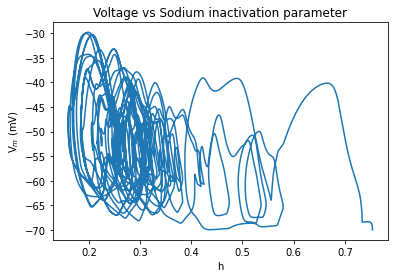

In [ ]:
%matplotlib inline
fig = pyplot.figure()
pyplot.plot(hvecMean, vvecMean, label="")
pyplot.xlabel('h')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Sodium inactivation parameter')
fig.show()

No handles with labels found to put in legend.


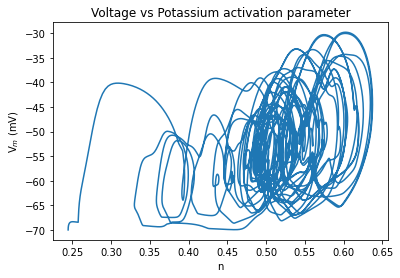

In [ ]:
fig = pyplot.figure()
pyplot.plot(nvecMean, vvecMean, label="")
pyplot.xlabel('n')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Potassium activation parameter')
pyplot.legend(frameon=False)

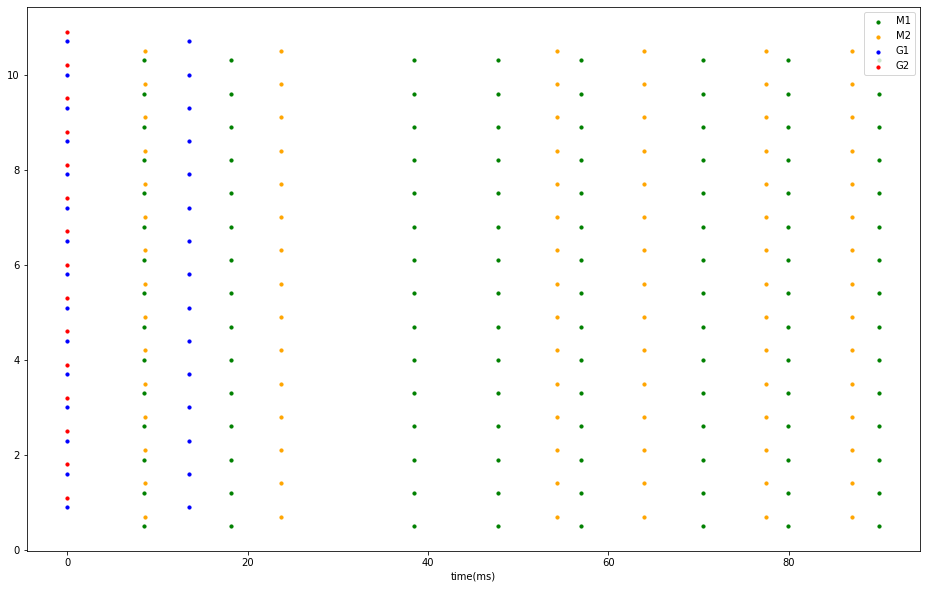

In [ ]:
color=['green','orange','blue','red']
label=['M1','M2','G1','G2']
plt1.figure(figsize=(16,10))
for j in range(len(L1.sets)):
  #for i,cell in enumerate(L1.sets[j].cells):
    plt1.scatter(L1.sets[j].cells[0].spike_times, [0.5 + 0.7*j for i in range(len(L1.sets[j].cells[0].spike_times))], s=10,color=color[0]) # for M1
    plt1.scatter(L1.sets[j].cells[1].spike_times, [0.7 + 0.7*j for i in range(len(L1.sets[j].cells[1].spike_times))], s=10, color=color[1]) # for M2
    plt1.scatter(L1.sets[j].cells[2].spike_times, [0.9 + 0.7*j for i in range(len(L1.sets[j].cells[2].spike_times))], s=10, color=color[2]) # for G1
    plt1.scatter(L1.sets[j].cells[3].spike_times, [1.1 + 0.7*j for i in range(len(L1.sets[j].cells[3].spike_times))], s=10, color=color[3]) # for G2

plt1.xlabel('time(ms)')
plt1.legend(label)

### Stage 10: Visualize the spike timing of each neuron in a set

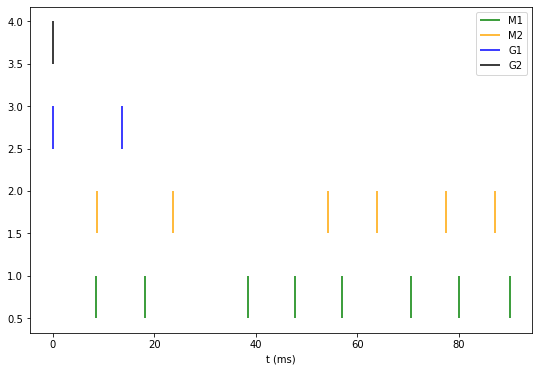

In [ ]:
color=['green','orange','blue','black']
label=['M1','M2','G1', 'G2']
plt1.figure(figsize=(9,6))
for i,cell in enumerate(L1.sets[2].cells):
    plt1.vlines(cell.spike_times, i + 0.5, i + 1,color=color[i],label=label[i])
plt1.xlabel('t (ms)')
plt1.legend()
plt1.show()

In [ ]:
#KNN
import numpy as np
import pandas as pd
df = pd.DataFrame([[1.3,1.4,2,2,1],[2.76,1.46,2.46,1.96,1],[4.6,2.1,4.5,1.3,0],[1.957,2.32,2.345,1.34,0],[2.4,2.2,2.6,1.5,0],[2.544,2.716,2.415,2.736,1],[1.317,2.053,2.616,2.4157,1],[1.215, 1.6852, 1.94, 1.25, 0],[1.934, 1.0598, 1.652, 1.349,1]])
df

0       1      2       3  4
0  1.300  1.4000  2.000  2.0000  1
1  2.760  1.4600  2.460  1.9600  1
2  4.600  2.1000  4.500  1.3000  0
3  1.957  2.3200  2.345  1.3400  0
4  2.400  2.2000  2.600  1.5000  0
5  2.544  2.7160  2.415  2.7360  1
6  1.317  2.0530  2.616  2.4157  1
7  1.215  1.6852  1.940  1.2500  0
8  1.934  1.0598  1.652  1.3490  1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

X = df.loc[:,:3] 
y = df.loc[:,4]
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1)
  
knn = KNeighborsClassifier(n_neighbors=2) 
  
knn.fit(X_train, y_train) 
  
# Calculate the accuracy of the model 
print(knn.score(X_test, y_test)) 


0.75


In [ ]:
t = np.array(weights[0:4])
b = np.reshape(t,(1,-1))
print(list(knn.predict(b)))

[0]


In [ ]:
def KNN(weights):
    t = np.array(weights[0:4])
    b = np.reshape(t,(1,-1))
    #print(list(knn.predict(b)))
    return list(knn.predict(b))

In [ ]:
epoch = 0
while epoch != 1200:
    tr = KNN(weights[0:4])
    if tr == [1]:
        print('Weights modulated')
    print(tr)
    if tr == [0]:
        for i in range(0,len(weights[0:4])):
            weights[i] += 0.001
    else:
        break
    epoch += 1

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [ ]:
print(weights)

[5.8505855500004005, 4.128401539999925, 4.881341160000259, 2.5048730399998678, 1.07771946, 3.15136447, 1.04247865, 2.29878494, 2.01195344]
